C:\Users\Omar\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
C:\Users\Omar\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
C:\Users\Omar\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
C:\Users\Omar\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


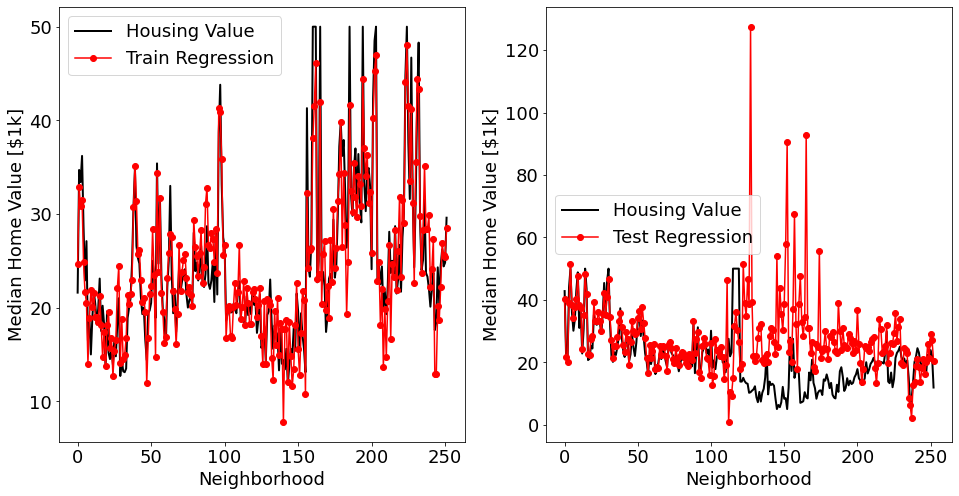

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os

plt.rcParams['figure.figsize']=[16,8]
plt.rcParams.update({'font.size':18})
# Load dataset
H = np.loadtxt(os.path.join('c:/users/omar','DATA','housing.data'))
b = H[:,-1] # housing values in $1000s
A = H[:,:-1] # other factors
# Pad with ones for nonzero offset
A = np.pad(A,[(0,0),(0,1)],mode='constant',constant_values=1)

n = 253 ;
#Split the data to prevent overfitting 
btrain=b[1:n] 

btest=b[n:] 

Atrain=A[1:n] 

Atest=A[n:]

#We solve for Ax=b using the Atrain matrix

U, S, VT= np.linalg.svd(Atrain, full_matrices=0)

S=np.diag(S)

Xtilde= VT.T@np.linalg.inv(S) @ U.T @ btrain

#Then, project the Xtilde with the corespond matrix, the plot will contain the number of observations on X and the estimated b values on Y
fig = plt.figure()
ax1 = fig.add_subplot(121)

plt.plot(btrain, Color='k', LineWidth=2, label='Housing Value') # True relationship
plt.plot(Atrain@Xtilde, '-o', Color='r', LineWidth=1.5, MarkerSize=6, label='Train Regression')
plt.xlabel('Neighborhood')
plt.ylabel('Median Home Value [$1k]')
plt.legend()



ax3 = fig.add_subplot(122)

plt.plot(btest, Color='k', LineWidth=2, label='Housing Value') # True relationship
plt.plot(Atest@Xtilde, '-o', Color='r', LineWidth=1.5, MarkerSize=6, label='Test Regression')
plt.xlabel('Neighborhood')
plt.ylabel('Median Home Value [$1k]')
plt.legend()

plt.show()


C:\Users\Omar\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
C:\Users\Omar\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
C:\Users\Omar\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
C:\Users\Omar\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


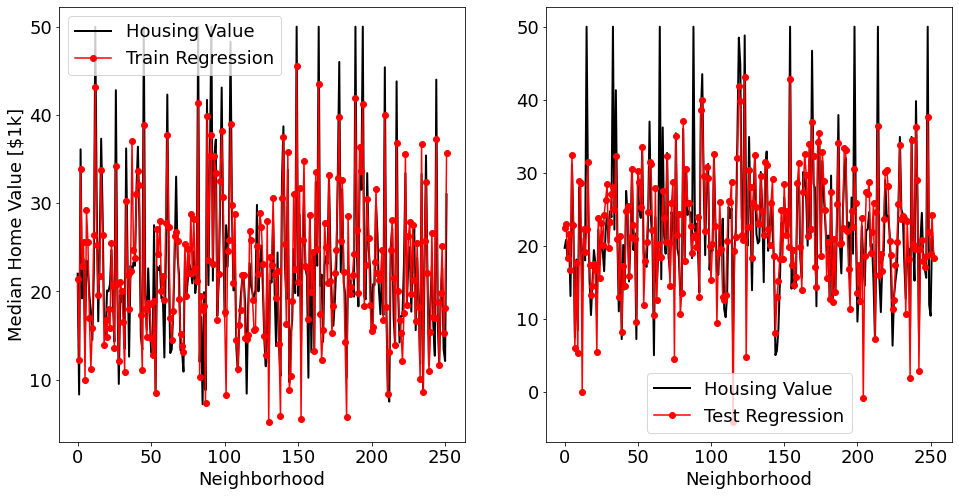

In [8]:
plt.rcParams['figure.figsize']=[16,8]
plt.rcParams.update({'font.size':18})
# Load dataset
H = np.loadtxt(os.path.join('c:/users/omar','DATA','housing.data'))
b = H[:,-1] # housing values in $1000s

A = H[:,:-1] # other factors
# Pad with ones for nonzero offset

A = np.pad(A,[(0,0),(0,1)],mode='constant',constant_values=1)

n = 253 ;

#To improve the accuracy, randomly select the test sets and the train sets
p=np.random.permutation(506)

A = A[p,:]
b = b[p]

btrain=b[1:n] 

btest=b[n:] 

Atrain=A[1:n] 

Atest=A[n:]

#We solve for Ax=b using the Atrain matrix

U1, S1, VT1= np.linalg.svd(Atrain, full_matrices=0)

S=np.diag(S1)

Xtilde= VT1.T@np.linalg.inv(S) @ U1.T @ btrain


fig = plt.figure()
ax1 = fig.add_subplot(121)


plt.plot(btrain, Color='k', LineWidth=2, label='Housing Value') # True relationship
plt.plot(Atrain@Xtilde, '-o', Color='r', LineWidth=1.5, MarkerSize=6, label='Train Regression')
plt.xlabel('Neighborhood')
plt.ylabel('Median Home Value [$1k]')
plt.legend()

ax2 = fig.add_subplot(122)
plt.plot(btest, Color='k', LineWidth=2, label='Housing Value') # True relationship
plt.plot(Atest@Xtilde, '-o', Color='r', LineWidth=1.5, MarkerSize=6, label='Test Regression')
plt.xlabel('Neighborhood')
plt.legend()

plt.show()


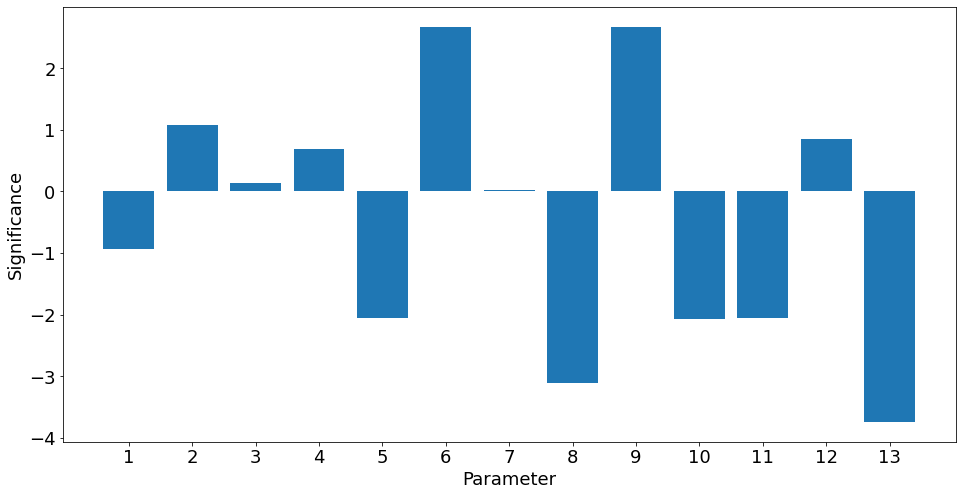

In [10]:
#Calculate the mean to measure the variance in the parameters
A_mean = np.mean(A,axis=0)
A_mean = A_mean.reshape(-1, 1)

A2 = A - np.ones((A.shape[0],1)) @ A_mean.T

for j in range(A.shape[1]-1):
    A2std = np.std(A2[:,j])
    #Construct a variance matrix
    A2[:,j] = A2[:,j]/A2std
    
A2[:,-1] = np.ones(A.shape[0])

U, S, VT = np.linalg.svd(A2,full_matrices=0)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b
x_tick = range(len(x)-1)+np.ones(len(x)-1)
plt.bar(x_tick,x[:-1])
plt.xlabel('Parameter')
plt.ylabel('Significance')
plt.xticks(x_tick)
plt.show()